### Musical instrument characteristic (Spectrogram)

In [11]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import os

def FFT_graph(wave_path):
    y, sr = librosa.load(wave_path, sr=None)

    fft_output = np.abs(np.fft.fft(y))[:len(y)//2]
    frequencies = np.linspace(0, sr//2, len(fft_output))

    peak_index = np.argmax(fft_output)
    peak_frequency = frequencies[peak_index]
    peak_magnitude = fft_output[peak_index]

    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, fft_output, color="blue")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("FFT Spectrum (Librosa)")

    plt.text(peak_frequency, peak_magnitude, f"{peak_frequency:.2f} Hz", color='red', fontsize=12, verticalalignment='bottom')

    plt.xlim(0, sr//2)
    plt.grid()
    plt.legend()
    plt.show()


C:\Users\napat\AppData\Local\Temp\ipykernel_34700\71951568.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


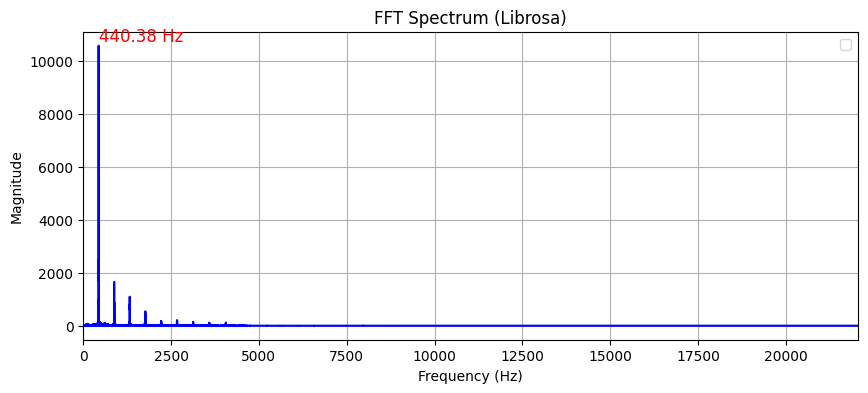

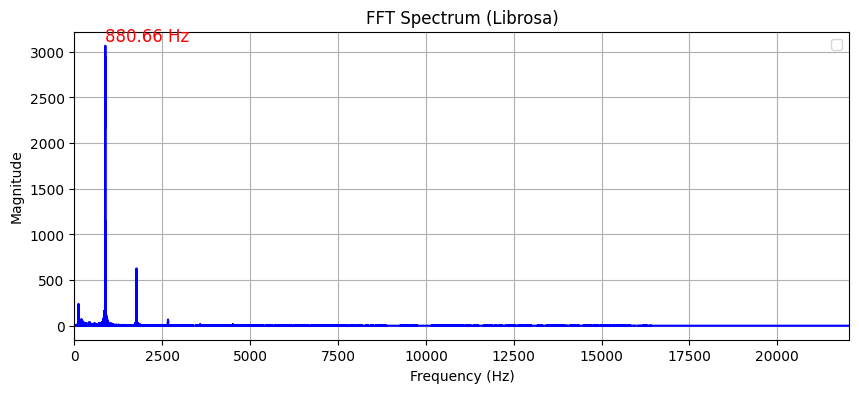

In [12]:
FFT_graph("A4_piano.mp3")
FFT_graph("A5_piano.mp3")

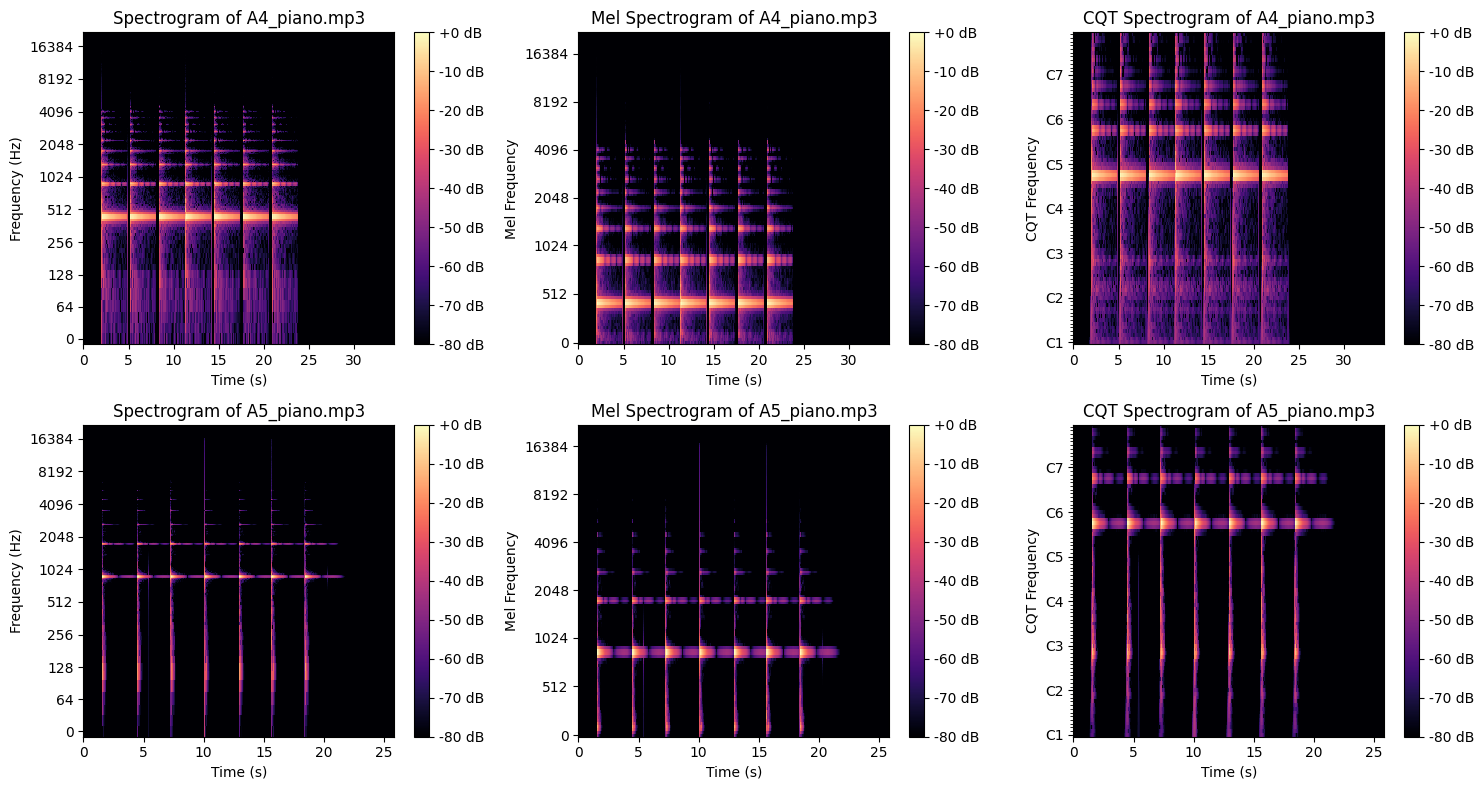

In [13]:
def plot_spectrogram_comparison(mp3_files):
    if len(mp3_files) < 2:
        print("Error: Please provide at least two MP3 files for comparison.")
        return
    
    num_files = len(mp3_files)
    plt.figure(figsize=(15, num_files * 4))
    spectrograms = []
    sr_list = []
    
    for i, mp3_file in enumerate(mp3_files):
        if not os.path.exists(mp3_file):
            print(f"Error: File '{mp3_file}' not found.")
            continue
        
        y, sr = librosa.load(mp3_file, sr=None)
        sr_list.append(sr)
        
        # Compute the STFT, Mel, and CQT spectrograms
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        M = librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr), ref=np.max)
        C = librosa.amplitude_to_db(np.abs(librosa.cqt(y=y, sr=sr)), ref=np.max)
        
        spectrograms.append((D, M, C))
        
        plt.subplot(num_files, 3, i * 3 + 1)
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Spectrogram of {os.path.basename(mp3_file)}')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        
        plt.subplot(num_files, 3, i * 3 + 2)
        librosa.display.specshow(M, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Mel Spectrogram of {os.path.basename(mp3_file)}')
        plt.xlabel('Time (s)')
        plt.ylabel('Mel Frequency')
        
        plt.subplot(num_files, 3, i * 3 + 3)
        librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='cqt_note')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'CQT Spectrogram of {os.path.basename(mp3_file)}')
        plt.xlabel('Time (s)')
        plt.ylabel('CQT Frequency')
    
    plt.tight_layout()
    plt.show()

mp3_files = ["A4_piano.mp3", "A5_piano.mp3"] 
plot_spectrogram_comparison(mp3_files)


### Experiment difference waves  
- Sine wave
- Square wave
- Triangle wave
- Sawtooth wave

#### Plot function

In [14]:
import scipy.io.wavfile as wav
from scipy.signal import square, sawtooth
import IPython.display as ipd


def generate_wave(frequency, duration, sample_rate=44100, amplitude=0.5, wave_type='sine'):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    if wave_type == 'sine':
        wave = np.sin(2 * np.pi * frequency * t)
    elif wave_type == 'square':
        wave = square(2 * np.pi * frequency * t)
    elif wave_type == 'triangle':
        wave = sawtooth(2 * np.pi * frequency * t, 0.5)
    elif wave_type == 'sawtooth':
        wave = sawtooth(2 * np.pi * frequency * t)
    else:
        raise ValueError("Unsupported wave type")
    return amplitude * wave

def mix_waves(waves):
    return np.sum(waves, axis=0) / len(waves)

def save_wave(filename, wave, sample_rate=44100):
    wave = np.int16(wave * 32767)  # Convert to 16-bit PCM format
    wav.write(filename, sample_rate, wave)
    
def visualize_wav_crop(input_filename, crop_duration=0.5):
    sample_rate, data = wav.read(input_filename)
    
    # Convert stereo to mono
    if len(data.shape) > 1:
        data = data.mean(axis=1)  # Convert to mono
    
    # Crop the first 'crop_duration' seconds
    num_samples = int(sample_rate * crop_duration)
    cropped_data = data[:num_samples]
    
    time = np.linspace(0, crop_duration, num_samples)

    plt.figure(figsize=(10, 4))
    plt.plot(time, cropped_data, color='blue')
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title(f"Waveform of First {crop_duration} seconds")
    plt.grid()
    plt.show()


#### Create sample waves

In [15]:
# Example usage
duration = 5  # seconds
sample_rate = 44100

wave1 = generate_wave(440, duration, sample_rate, amplitude=0.3, wave_type='sine')
wave2 = generate_wave(440, duration, sample_rate, amplitude=0.3, wave_type='square')
wave3 = generate_wave(440, duration, sample_rate, amplitude=0.3, wave_type='sawtooth')
wave4 = generate_wave(440, duration, sample_rate, amplitude=0.3, wave_type='triangle')

save_wave("wave1.wav", wave1, sample_rate)
save_wave("wave2.wav", wave2, sample_rate)
save_wave("wave3.wav", wave3, sample_rate)
save_wave("wave4.wav", wave4, sample_rate)

#### Visualize sample waves (Sine, Square, Triangle, Ramp)

C:\Users\napat\AppData\Local\Temp\ipykernel_34700\71951568.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


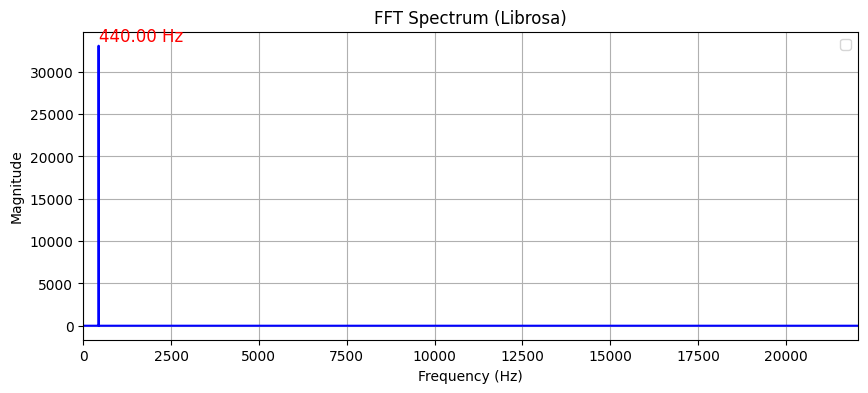

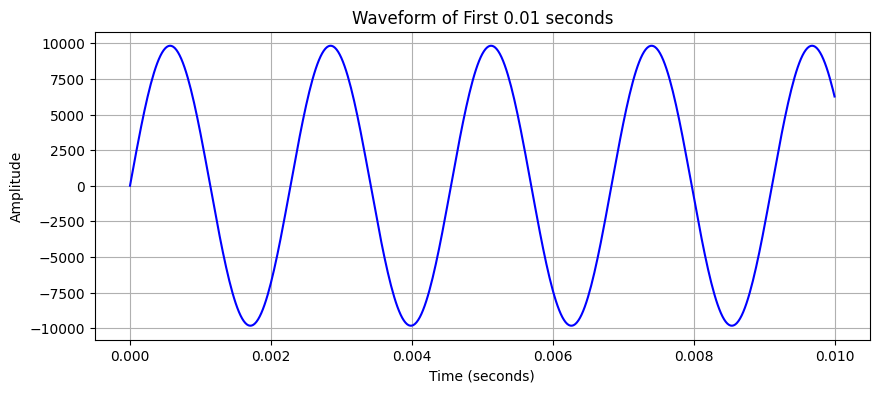

In [16]:

wave1_ = "wave1.wav"  # Replace with your file
FFT_graph(wave1_)
visualize_wav_crop(wave1_, 0.01)
ipd.Audio(wave1_)



C:\Users\napat\AppData\Local\Temp\ipykernel_34700\71951568.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


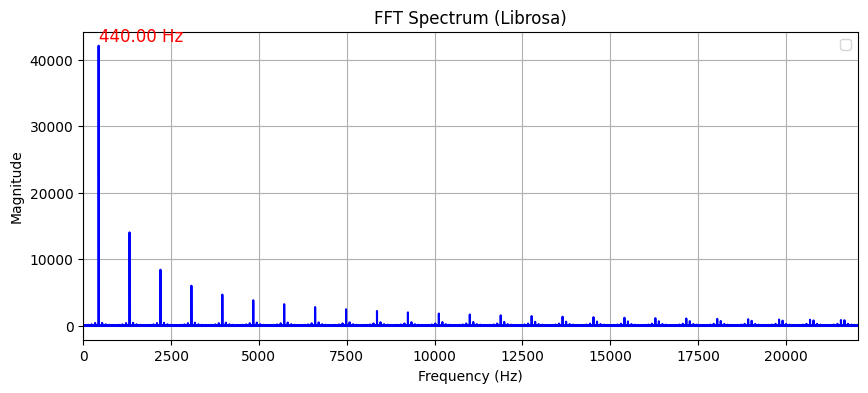

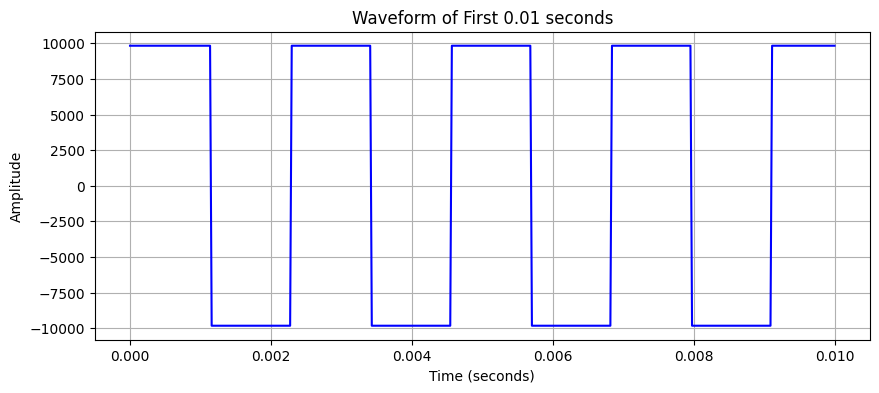

In [17]:
wave2_ = "wave2.wav"
FFT_graph(wave2_)
visualize_wav_crop(wave2_, 0.01)
ipd.Audio(wave2_)


C:\Users\napat\AppData\Local\Temp\ipykernel_34700\71951568.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


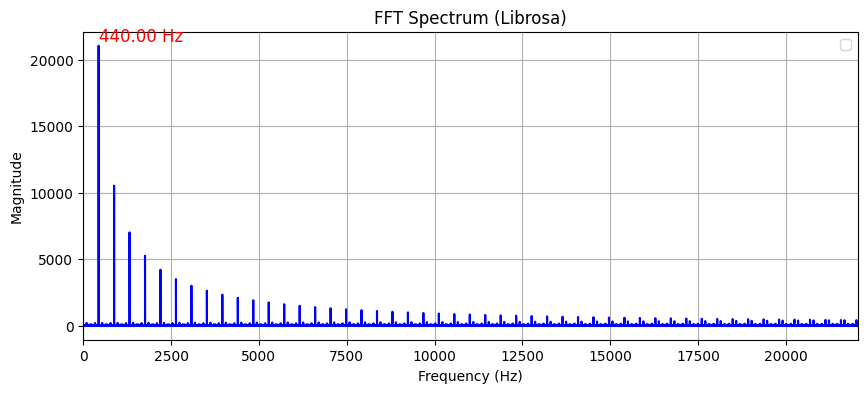

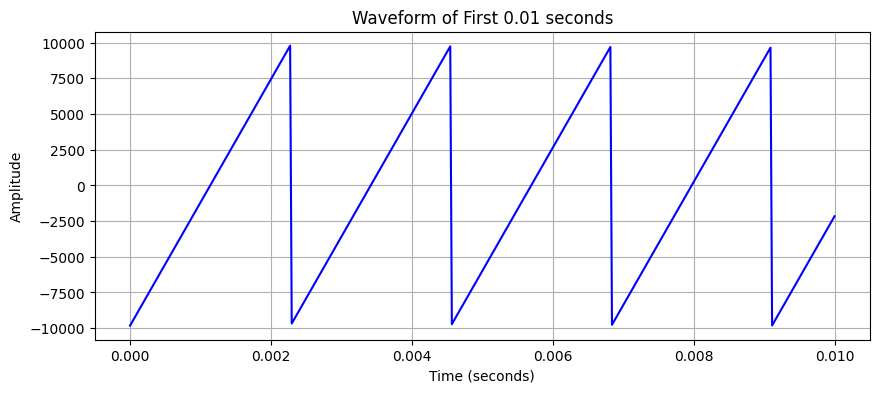

In [18]:
wave3_ = "wave3.wav"
FFT_graph(wave3_)
visualize_wav_crop(wave3_, 0.01)
ipd.Audio(wave3_)


C:\Users\napat\AppData\Local\Temp\ipykernel_34700\71951568.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


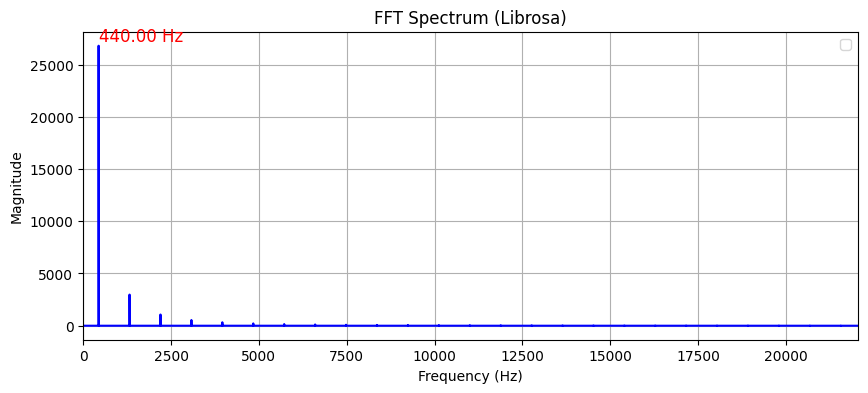

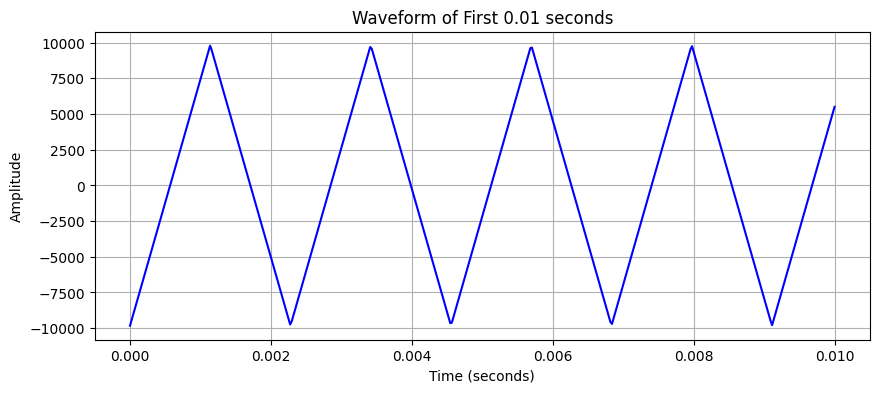

In [19]:
wave4_ = "wave4.wav"
FFT_graph(wave4_)
visualize_wav_crop(wave4_, 0.01)

ipd.Audio(wave4_)


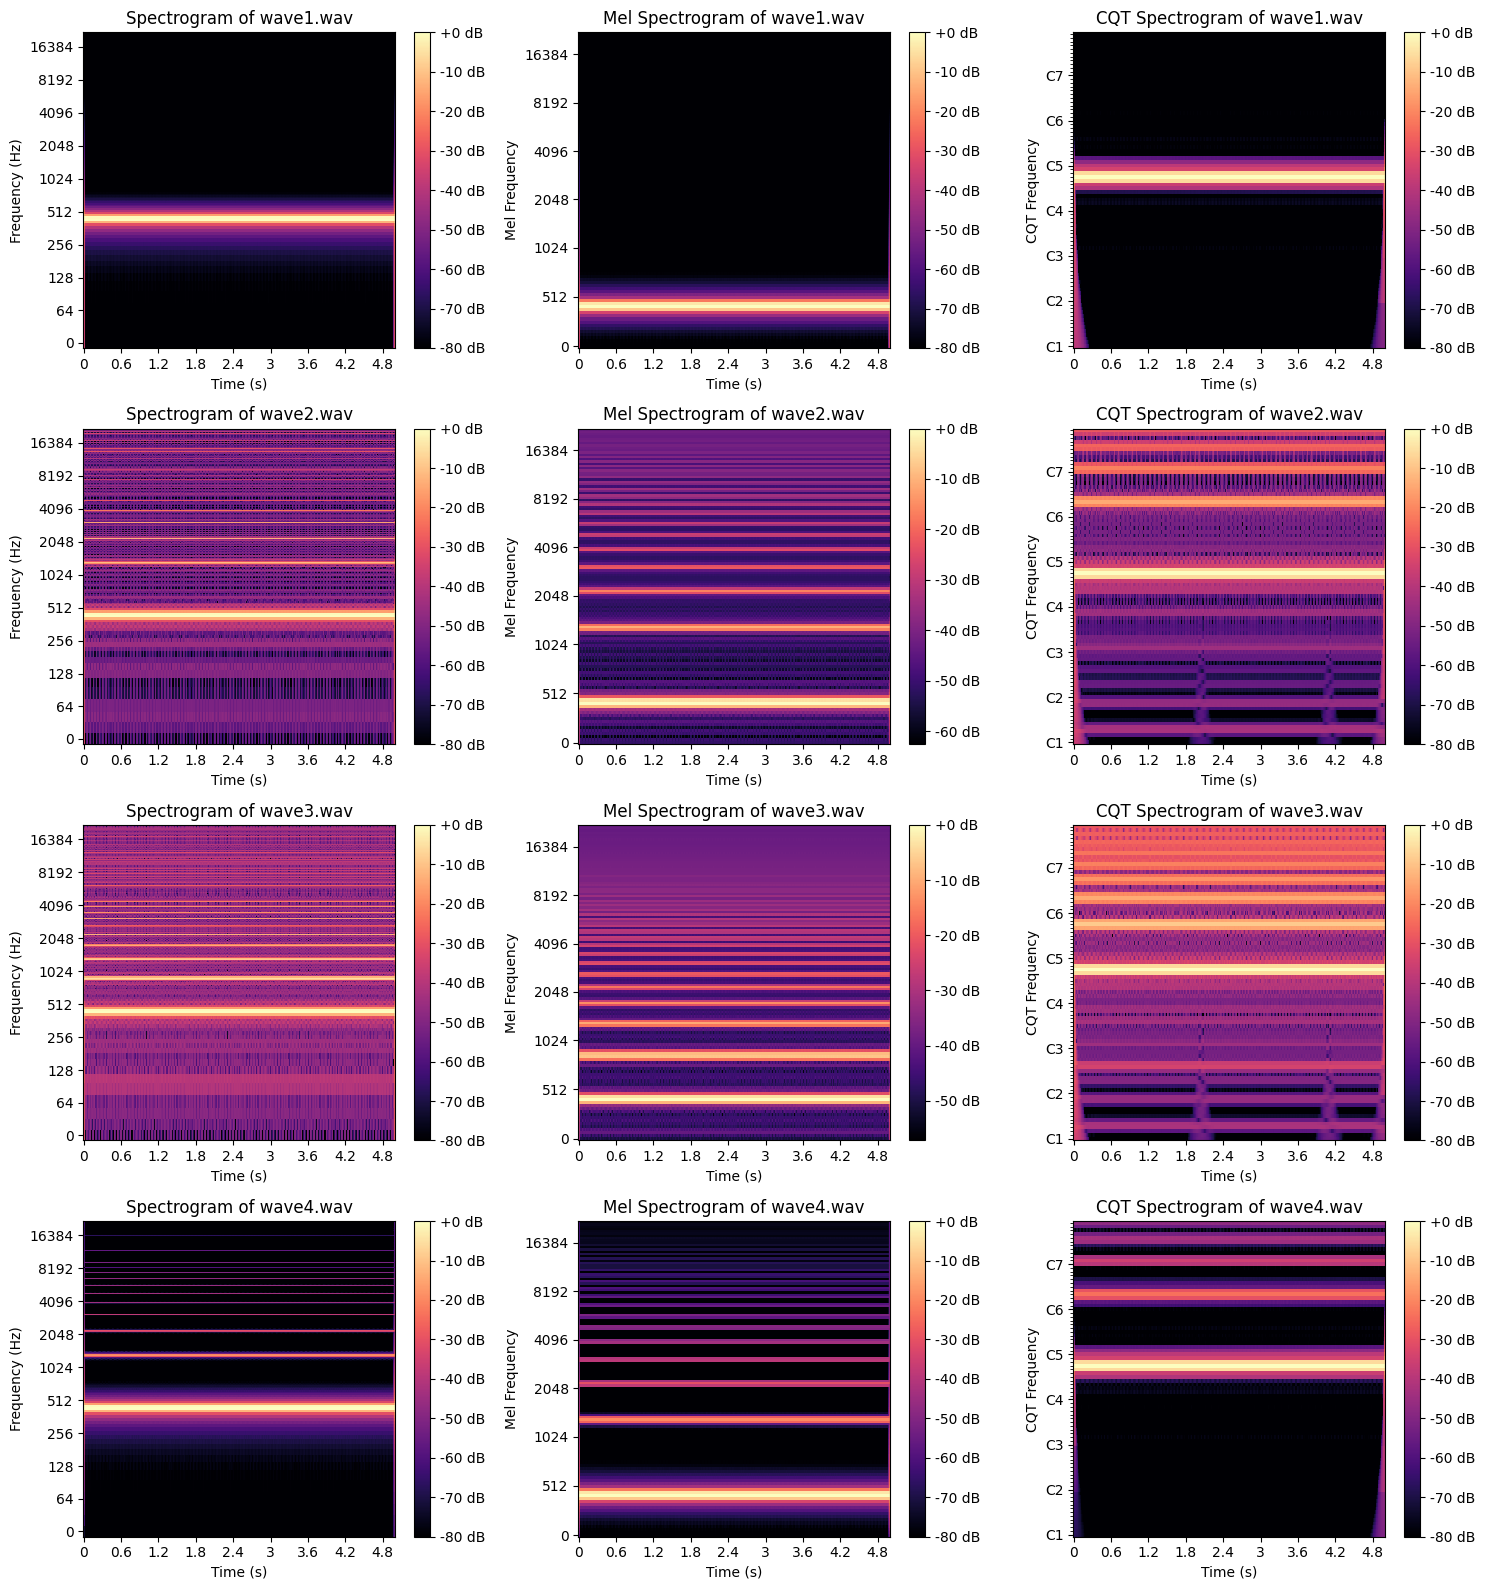

In [20]:
wave_files = [wave1_, wave2_, wave3_, wave4_] 
plot_spectrogram_comparison(wave_files)

#### Mixing wave together !

In [ ]:
mix = [wave1, wave2]
mixed_wave = mix_waves(mix)
save_wave("mixed_wave.wav", mixed_wave, sample_rate)

[array([ 0.        ,  0.0187945 ,  0.03751516, ..., -0.05608843,
        -0.03751516, -0.0187945 ]),
 array([ 0.3,  0.3,  0.3, ..., -0.3, -0.3, -0.3])]

C:\Users\napat\AppData\Local\Temp\ipykernel_34700\71951568.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


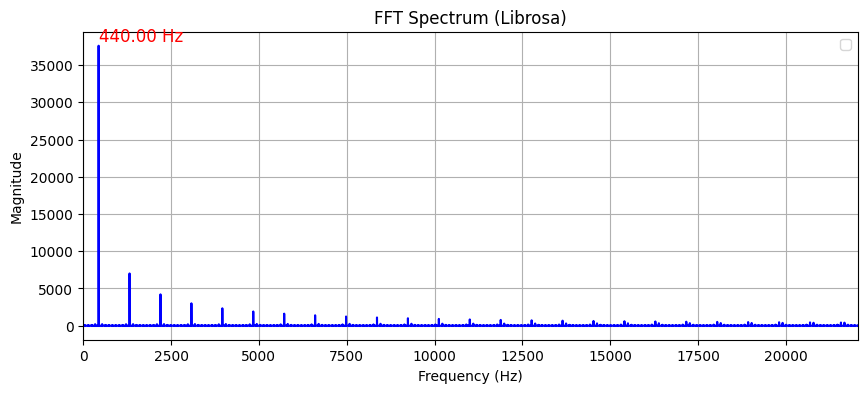

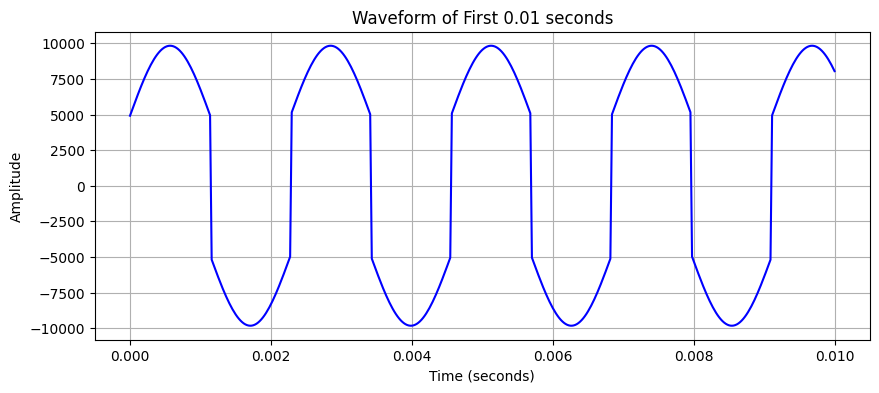

In [40]:
mixed_wave_ = "mixed_wave.wav"
FFT_graph("mixed_wave.wav")
visualize_wav_crop(mixed_wave_, 0.01)

ipd.Audio(mixed_wave_)

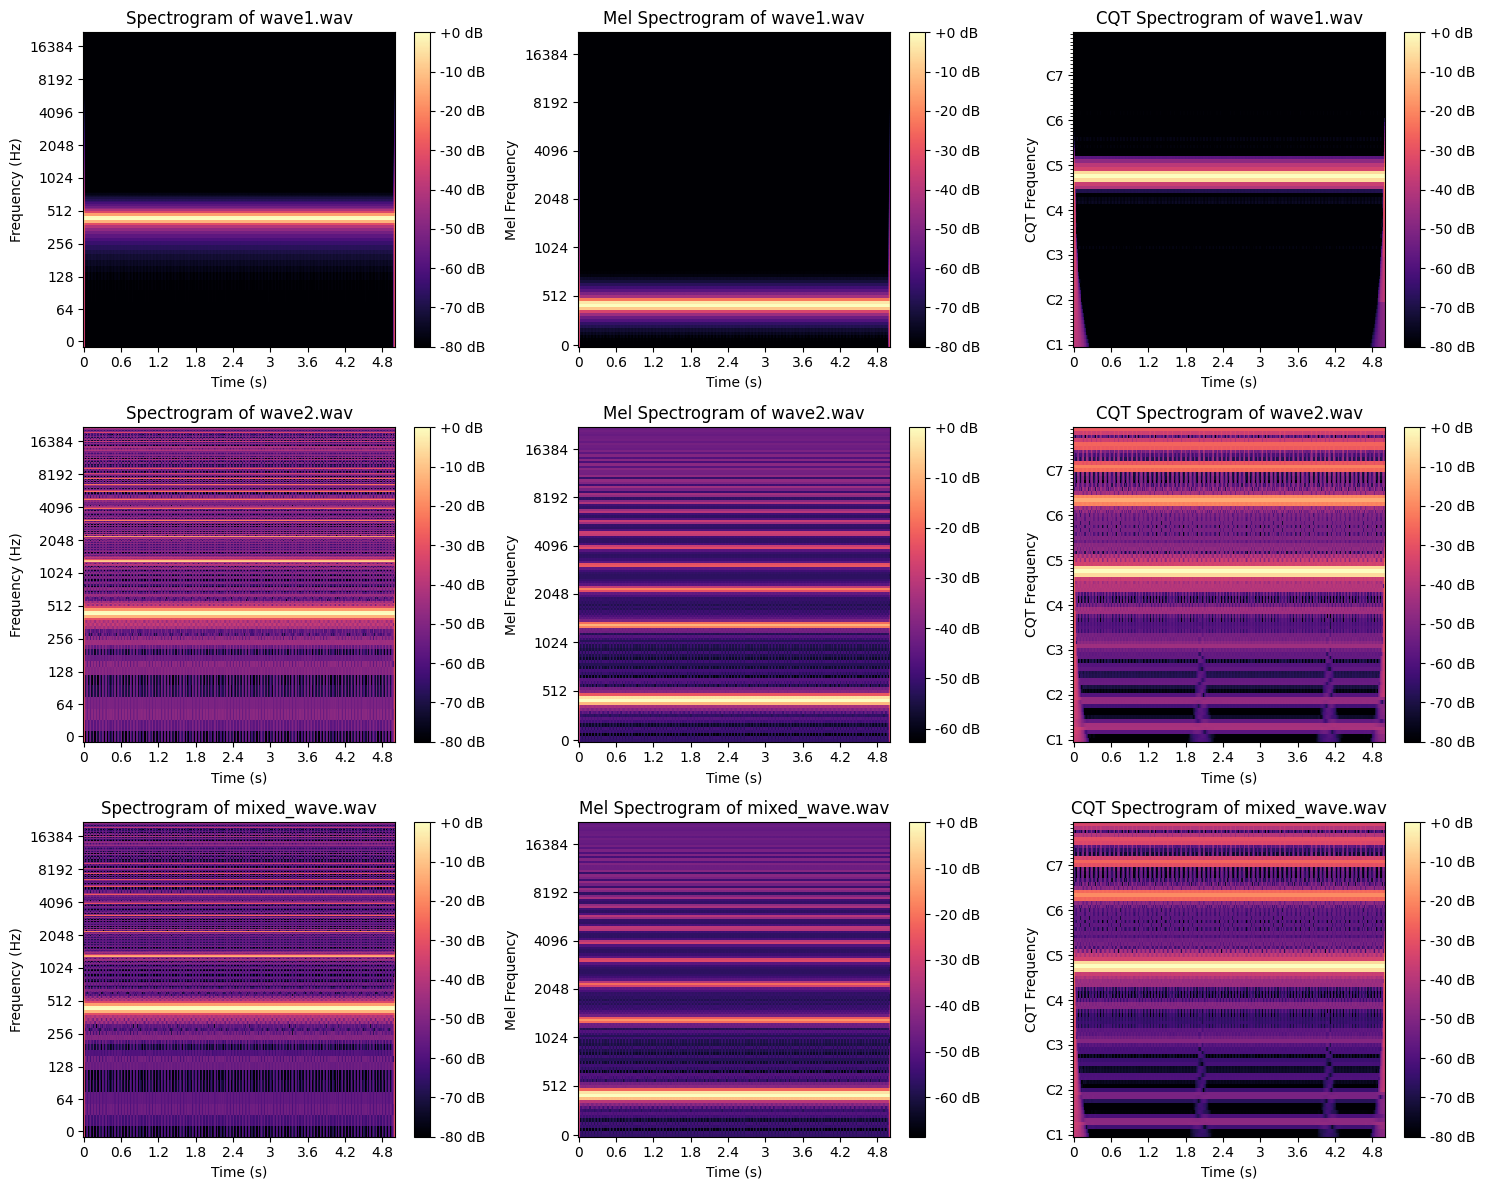

In [49]:
wave = [wave1_, wave2_, mixed_wave_]
plot_spectrogram_comparison(wave)

c:\Users\napat\AppData\Local\Programs\Python\Python311\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


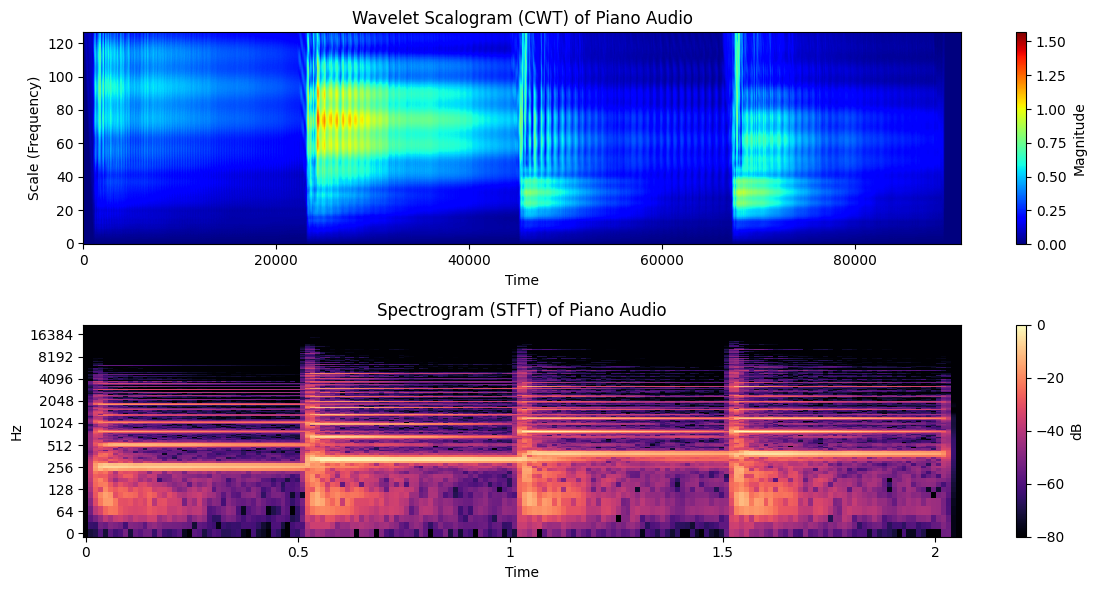

In [76]:
import pywt


# Load audio file
audio_path = "Piano3.mp3"  
y, sr = librosa.load(audio_path, sr=44100)

# Perform Continuous Wavelet Transform (CWT)
scales = np.arange(1, 128)  # Define scale range
coefficients, frequencies = pywt.cwt(y, scales, 'cmor', sampling_period=1/sr)

# Compute Short-Time Fourier Transform (STFT) Spectrogram
n_fft = 2048  # FFT window size
hop_length = 512  # Hop size
spectrogram = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

# Convert amplitude to dB for better visualization
spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

# Plot Wavelet Scalogram
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', origin='lower')
plt.colorbar(label='Magnitude')
plt.title("Wavelet Scalogram (CWT) of Piano Audio")
plt.xlabel("Time")
plt.ylabel("Scale (Frequency)")

# Plot Spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(spectrogram_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(label='dB')
plt.title("Spectrogram (STFT) of Piano Audio")

# Show plots
plt.tight_layout()
plt.show()


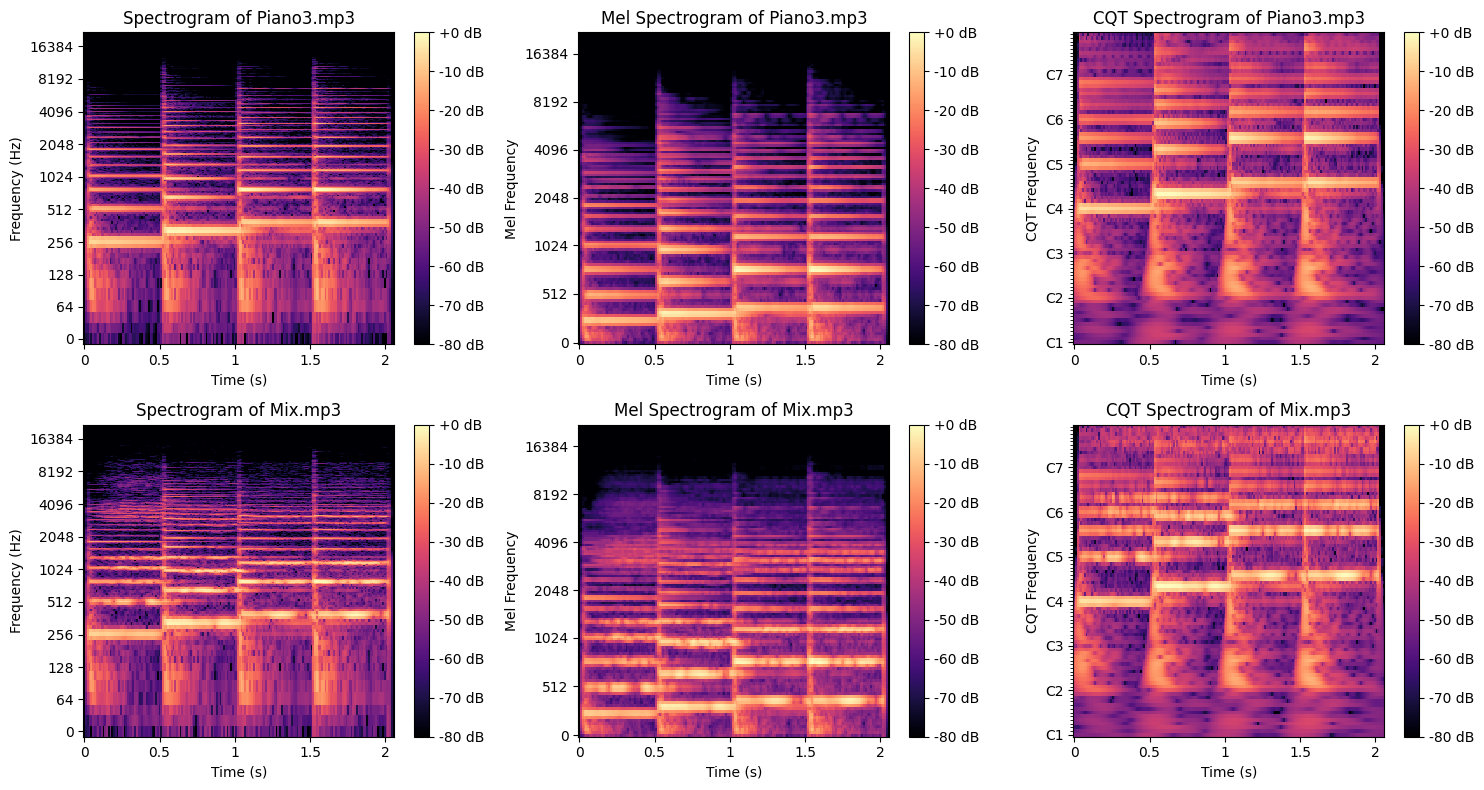

In [71]:
plot_spectrogram_comparison(["Piano3.mp3", "Mix.mp3"])

n_fft : FFT window size (Higher = better frequency resolution but worse at time resolution)  
hop_length : Step size between frame (Lower = better time resolution but need more computation time)